In [292]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-data-set/hour.csv
/kaggle/input/bike-sharing-dataset/test.csv
/kaggle/input/bike-sharing-dataset/train.csv


We have a file called hour.csv which contain hourly rental data of 2 different years on hourly basis for all 24 hours. It contain 17379 entries
none of whhich is nan, means no value from this dataset is missing.
we have object dteday which shows year-month-date.

General information about different features can be found by **info()** method on pandas data frame.
So we have first converted our csv file to pandas dataframe using **read_csv()** method.



In [293]:

total_data=pd.read_csv("/kaggle/input/bike-sharing-data-set/hour.csv")
total_data.head()



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Since date is not given in total_data by help of lambda function and split method we are converting string object into list object,
which will have year month and date as its value at 0,1 and 2 index and then choose value at 2nd index which is date.
and then we insert this date value in our total_data using 
**total_data['feature_name']=value**


And then as mentioned in question we take data upto first 19 days into train dataset and 
remaining in the test dataset.


In [294]:
date=total_data.dteday.apply(lambda x: x[0:].split('-')[2])
date=date.astype('int64')
total_data['date']=date
total_data.head()
train_d=total_data[(total_data['date']<=19)]
test_d=total_data[(total_data['date']>19)]

 Here head() method prints first 5 raws of our dataframe to peek how data looks like.

In [295]:
train_d.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [296]:
test_d.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
431,432,2011-01-20,1,0,1,0,0,4,1,1,0.26,0.2273,0.56,0.3881,5,8,13,20
432,433,2011-01-20,1,0,1,1,0,4,1,1,0.26,0.2727,0.56,0.0000,2,3,5,20
433,434,2011-01-20,1,0,1,2,0,4,1,1,0.26,0.2727,0.56,0.0000,0,2,2,20
434,435,2011-01-20,1,0,1,3,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1,20
435,436,2011-01-20,1,0,1,4,0,4,1,1,0.26,0.2576,0.56,0.1642,0,1,1,20



# conclusions from data:-


This info() method tells us that there are 10886 raws in our **train_d** dataframe which contain first 19 date data from total_data.
It has 18 columns out of which 13 are of type int, 4 are of type float and 1 object.

In [297]:
train_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 17092
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     10886 non-null  int64  
 1   dteday      10886 non-null  object 
 2   season      10886 non-null  int64  
 3   yr          10886 non-null  int64  
 4   mnth        10886 non-null  int64  
 5   hr          10886 non-null  int64  
 6   holiday     10886 non-null  int64  
 7   weekday     10886 non-null  int64  
 8   workingday  10886 non-null  int64  
 9   weathersit  10886 non-null  int64  
 10  temp        10886 non-null  float64
 11  atemp       10886 non-null  float64
 12  hum         10886 non-null  float64
 13  windspeed   10886 non-null  float64
 14  casual      10886 non-null  int64  
 15  registered  10886 non-null  int64  
 16  cnt         10886 non-null  int64  
 17  date        10886 non-null  int64  
dtypes: float64(4), int64(13), object(1)
memory usage: 1.6+ MB


**describe()** method gives us information about quanitative aspects of  int and float data like mean,variance,quantiles and so on.

In [298]:
train_d.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,8537.421183,2.506614,0.501929,6.521495,11.541613,0.028569,2.998622,0.680875,1.418427,0.493436,0.473102,0.618865,0.191036,36.021955,155.552177,191.574132,9.992559
std,5026.363303,1.116174,0.500019,3.444373,6.915838,0.166599,2.007770,0.466159,0.633839,0.190039,0.169492,0.192450,0.121859,49.960477,151.039033,181.144454,5.476608
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4282.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,4.000000,36.000000,42.000000,5.000000
50%,8666.500000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000,17.000000,118.000000,145.000000,10.000000
75%,13016.750000,4.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.770000,0.253700,49.000000,222.000000,284.000000,15.000000
max,17093.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.909100,1.000000,0.850700,367.000000,886.000000,977.000000,19.000000


Our **test_d data** frame contain 6493 values which are left after taking first 19 dates of month in train_d dataframe.

In [299]:
test_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 431 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     6493 non-null   int64  
 1   dteday      6493 non-null   object 
 2   season      6493 non-null   int64  
 3   yr          6493 non-null   int64  
 4   mnth        6493 non-null   int64  
 5   hr          6493 non-null   int64  
 6   holiday     6493 non-null   int64  
 7   weekday     6493 non-null   int64  
 8   workingday  6493 non-null   int64  
 9   weathersit  6493 non-null   int64  
 10  temp        6493 non-null   float64
 11  atemp       6493 non-null   float64
 12  hum         6493 non-null   float64
 13  windspeed   6493 non-null   float64
 14  casual      6493 non-null   int64  
 15  registered  6493 non-null   int64  
 16  cnt         6493 non-null   int64  
 17  date        6493 non-null   int64  
dtypes: float64(4), int64(13), object(1)
memory usage: 963.8+ KB


In [300]:
test_d.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,8945.809795,2.493300,0.503619,6.565070,11.555367,0.029108,3.012167,0.685815,1.436778,0.502942,0.480257,0.641252,0.188525,35.096566,150.827199,185.923764,25.224550
std,4991.272309,1.091258,0.500025,3.429462,6.912526,0.168123,2.002541,0.464226,0.648390,0.196575,0.175655,0.192934,0.123137,48.184374,151.854968,181.753469,3.339411
min,432.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.160000,0.000000,0.000000,0.000000,1.000000,20.000000
25%,4770.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.490000,0.104500,4.000000,32.000000,37.000000,22.000000
50%,9122.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.520000,0.500000,0.650000,0.164200,17.000000,111.000000,138.000000,25.000000
75%,13477.000000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.810000,0.253700,48.000000,216.000000,275.000000,28.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.980000,1.000000,1.000000,0.835800,347.000000,885.000000,976.000000,31.000000


to get insight from data we will plot count values for year,season,month,date and time values matplotlib.

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns


now using groupby method on our dataframe we will find mean values of count feature for different different 
groups of year,season,month and date values.

For printing mean values of count for year 0 and 1 we have used groupby() method, this method groups data as per given input feature
and then we obtain value of mean of count using **train_d.groupby('yr')['cnt'].mean()**

Or we can find mean by explicitly writing **(train_d['season']==1)** which give us all raws with season 1 and then finding mean of count in those raws.

Mean per year:-
* 0    144.223349
* 1    238.560944

Mean per Season:-
* season1:  116.34326135517499
* season2:  215.25137211855105
* season3:  234.417124039517
* season4:  198.98829553767374

In [302]:
years=train_d.groupby('yr')['cnt'].mean()
print(years)
print('\n')

season1=train_d[(train_d['season']==1)]['cnt'].mean()
print("season1: ",season1)
season2=train_d[(train_d['season']==2)]['cnt'].mean()
print("season2: ",season2)
season3=train_d[(train_d['season']==3)]['cnt'].mean()
print("season3: ",season3)
season4=train_d[(train_d['season']==4)]['cnt'].mean()
print("season4: ",season4)

yr
0    144.223349
1    238.560944
Name: cnt, dtype: float64


season1:  116.34326135517499
season2:  215.25137211855105
season3:  234.417124039517
season4:  198.98829553767374


Similarly we can

In [303]:
months_mean=train_d.groupby('mnth')['cnt'].mean()
print(months_mean)

mnth
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: cnt, dtype: float64


In [304]:
dates_mean=train_d.groupby('date')['cnt'].mean()
print(dates_mean)
#mean count for each day

date
1     180.333913
2     183.910995
3     194.696335
4     195.705575
5     189.765217
6     189.860140
7     183.773519
8     179.041812
9     187.897391
10    195.183566
11    195.679577
12    190.675393
13    194.160279
14    195.829268
15    201.527875
16    191.353659
17    205.660870
18    192.605684
19    192.311847
Name: cnt, dtype: float64


**And as asked we can also plot these mean values of count for different groups using matplotlib.
subplot provide us convenience to plot different plots simultaneously 3*2=6plots.**

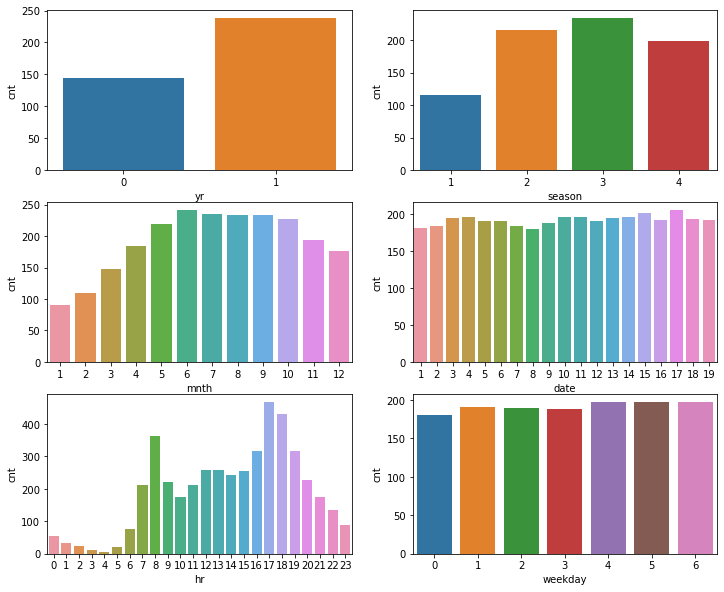

In [305]:
fig = plt.figure(figsize=[12,10])
x1 = fig.add_subplot(3,2,1)
x1 = sns.barplot(x='yr',y='cnt',data=train_d.groupby('yr')['cnt'].mean().reset_index())

x2 = fig.add_subplot(3,2,2)
x2 = sns.barplot(x='season',y='cnt',data=train_d.groupby('season')['cnt'].mean().reset_index())

x3 = fig.add_subplot(3,2,3)
x3 = sns.barplot(x='mnth',y='cnt',data=train_d.groupby('mnth')['cnt'].mean().reset_index())

x4 = fig.add_subplot(3,2,4)
x4 = sns.barplot(x='date',y='cnt',data=train_d.groupby('date')['cnt'].mean().reset_index())

x5 = fig.add_subplot(3,2,5)
x5 = sns.barplot(x='hr',y='cnt',data=train_d.groupby('hr')['cnt'].mean().reset_index())

x6= fig.add_subplot(3,2,6)
x6= sns.barplot(x='weekday',y='cnt',data=train_d.groupby('weekday')['cnt'].mean().reset_index())


**Now its time to find linear regression root mean square error values for both and train and test data and we 
will do this with the help of nd arrays which provide various matrix functionality.**


and we will take count as Y for both of our train and test data.


In [306]:

Y_train=train_d['cnt']
Y_test=test_d['cnt']





In [307]:
Y_train = np.array(Y_train).reshape(-1,1)
Y_test = np.array(Y_test).reshape(-1,1)
Y_train

array([[ 16],
       [ 40],
       [ 32],
       ...,
       [168],
       [129],
       [ 88]])

We will do some manipulation on dataframe so its better to have a copy of our train and test data and use these
for linear regression.
we are aslo applying one hot encoding on holiday, weathersit, and season.


In [308]:
posrgsn_train=train_d.copy()
posrgsn_test=test_d.copy()

posrgsn_train=pd.get_dummies(posrgsn_train,columns=['holiday','weathersit','season'],drop_first=False)
posrgsn_test=pd.get_dummies(posrgsn_test,columns=['holiday','weathersit','season'],drop_first=False)

For training L1 and L2 norm models we take simple training model data and randomly assign 80% of data to new testing data
and remaining 20% data to validation data.

In [309]:
np.random.seed(10)
mask=np.random.rand(len(posrgsn_train)) < .8
Rposrgsn_train=posrgsn_train[mask].copy()
Rposrgsn_validation=posrgsn_train[~mask].copy()

Now from this New (for Regularization-R) training and testing data assing RYvalidation and RYtrain

In [310]:
RY_train=Rposrgsn_train['cnt']
RY_validation=Rposrgsn_validation['cnt']

RY_train = np.array(RY_train).reshape(-1,1)
RY_validation = np.array(RY_validation).reshape(-1,1)

> Remove all other features such as registered,casual and dteday.
> Also remove features like working day, atemp which are highly correlated with holiday and temperature. 

In [311]:

posrgsn_train.drop(['casual','registered','dteday','cnt','instant','workingday','atemp'],axis=1,inplace=True)
posrgsn_test.drop(['casual','registered','dteday','cnt','instant','workingday','atemp'],axis=1,inplace=True)
Rposrgsn_train.drop(['casual','registered','dteday','cnt','instant','workingday','atemp'],axis=1,inplace=True)
Rposrgsn_validation.drop(['casual','registered','dteday','cnt','instant','workingday','atemp'],axis=1,inplace=True)

In [312]:
posrgsn_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 431 to 17378
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            6493 non-null   int64  
 1   mnth          6493 non-null   int64  
 2   hr            6493 non-null   int64  
 3   weekday       6493 non-null   int64  
 4   temp          6493 non-null   float64
 5   hum           6493 non-null   float64
 6   windspeed     6493 non-null   float64
 7   date          6493 non-null   int64  
 8   holiday_0     6493 non-null   uint8  
 9   holiday_1     6493 non-null   uint8  
 10  weathersit_1  6493 non-null   uint8  
 11  weathersit_2  6493 non-null   uint8  
 12  weathersit_3  6493 non-null   uint8  
 13  weathersit_4  6493 non-null   uint8  
 14  season_1      6493 non-null   uint8  
 15  season_2      6493 non-null   uint8  
 16  season_3      6493 non-null   uint8  
 17  season_4      6493 non-null   uint8  
dtypes: float64(3), int64(5), 

In [323]:
posrgsn_train.head()

,yr,mnth,hr,weekday,temp,hum,windspeed,date,holiday_0,holiday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
0,0,1,0,6,0.24,0.81,0.0,1,1,0,1,0,0,0,1,0,0,0
1,0,1,1,6,0.22,0.80,0.0,1,1,0,1,0,0,0,1,0,0,0
2,0,1,2,6,0.22,0.80,0.0,1,1,0,1,0,0,0,1,0,0,0
3,0,1,3,6,0.24,0.75,0.0,1,1,0,1,0,0,0,1,0,0,0
4,0,1,4,6,0.24,0.75,0.0,1,1,0,1,0,0,0,1,0,0,0


We will normalize our data to so that at the end we can make some sense of our rmse values and to be consistent
with our features and in some ml methods it is very critical for better optimization.

In [314]:
X_train=np.array(posrgsn_train.values)

X_test=np.array(posrgsn_test.values)


In [324]:
print(X_train)

array([0.  , 1.  , 4.  , 6.  , 0.24, 0.75, 0.  , 1.  , 1.  , 0.  , 1.  ,
       0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ])

In [351]:
def prediction(w, X):
    y_hat = np.exp(np.matmul(X, w))
    return y_hat

def gradient(X, y, y_hat):
    gradient = np.divide(np.matmul(np.transpose(X), np.subtract(y_hat, y)), len(y))
    #gradient = np.matmul(np.transpose(X), np.subtract(y_hat, y))
    return gradient
    
def gradient_l1(X, y, y_hat, w, reg_const):
    gradient_values = gradient(X, y, y_hat)
    m = len(w)
    for j in range(len(w)):
        if w[j,0] > 0:
            gradient_values[j,0] += (reg_const /m)
        else: 
            gradient_values[j,0] -= (reg_const / m)
            
    return gradient_values
    
def gradient_l2(X, y, y_hat, w, reg_const):
    gradient_values_l2 = gradient(X, y, y_hat) + reg_const * w 
    return gradient_values_l2


def gradient_descent(X, y, alpha = 0.00001, iterations = 50000, reg_const =0, debug =True):
    w = np.zeros((len(X[1,:]), 1))
    for i in range(iterations):
        y_hat = prediction(w, X)
        gradient_value = gradient(X, y, y_hat)
        w = np.subtract(w, alpha * gradient_value)
    return w 

def gradient_descent1(X, y, alpha = 0.00001, iterations = 50000, reg_const =0, debug =True):
    w = np.zeros((len(X[1,:]), 1))
    for i in range(iterations):
        y_hat = prediction(w, X)
        gradient_value = gradient_l1(X, y, y_hat,w,reg_const)
        w = np.subtract(w, alpha * gradient_value)
    return w 

def gradient_descent2(X, y, alpha = 0.00001, iterations = 50000, reg_const =0, debug =True):
    w = np.zeros((len(X[1,:]), 1))
    for i in range(iterations):
        y_hat = prediction(w, X)
        gradient_value = gradient_l2(X, y, y_hat,w,reg_const)
        w = np.subtract(w, alpha * gradient_value)
    return w 


    

training X and training Y, now calculate wcap using gradient descent.

In [339]:
print(X_train)
print(Y_train)
wcap= gradient_descent(X_train, Y_train, iterations = 10000)

[[ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  1.  1. ...  0.  0.  0.]
 [ 0.  1.  2. ...  0.  0.  0.]
 ...
 [ 1. 12. 21. ...  0.  0.  1.]
 [ 1. 12. 22. ...  0.  0.  1.]
 [ 1. 12. 23. ...  0.  0.  1.]]
[[ 16]
 [ 40]
 [ 32]
 ...
 [168]
 [129]
 [ 88]]


In [340]:
Y_train_hat= np.exp(np.matmul(X_train, wcap))

For poission regression, training rmse and plot 

155.90952773356904


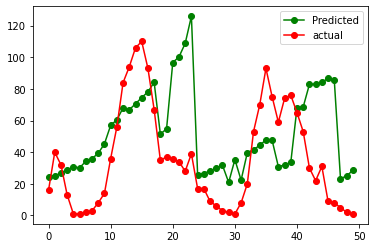

In [341]:
rmse_train = np.sqrt(np.mean((Y_train - Y_train_hat)**2))
print(rmse_train)
fig = plt.figure()
predicted = plt.plot(range(50), Y_train_hat[:50],'go-',label='Predicted')
actual = plt.plot(range(50), Y_train[:50], 'ro-',label="actual")
plt.legend()
plt.show()


For poission regression test rmse and plot

155.90952773356904


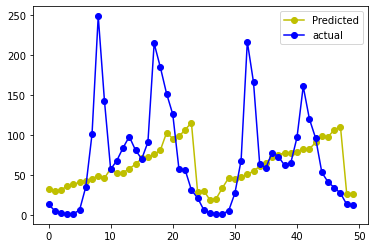

In [342]:
Y_test_hat= np.exp(np.matmul(X_test, wcap))
rmse_test = np.sqrt(np.mean((Y_train - Y_train_hat)**2))
print(rmse_test)
fig = plt.figure()
predicted = plt.plot(range(50), Y_test_hat[:50],'yo-',label='Predicted')
actual = plt.plot(range(50), Y_test[:50], 'bo-',label="actual")
plt.legend()
plt.show()


copying train data for regularization and to convert it into 2 different sets ,new training set and validation set.
10886*0.8= 8708 new training set and remaining 20% validation set which is 2177.

In [344]:
Rposrgsn_validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 11 to 17083
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            2117 non-null   int64  
 1   mnth          2117 non-null   int64  
 2   hr            2117 non-null   int64  
 3   weekday       2117 non-null   int64  
 4   temp          2117 non-null   float64
 5   hum           2117 non-null   float64
 6   windspeed     2117 non-null   float64
 7   date          2117 non-null   int64  
 8   holiday_0     2117 non-null   uint8  
 9   holiday_1     2117 non-null   uint8  
 10  weathersit_1  2117 non-null   uint8  
 11  weathersit_2  2117 non-null   uint8  
 12  weathersit_3  2117 non-null   uint8  
 13  weathersit_4  2117 non-null   uint8  
 14  season_1      2117 non-null   uint8  
 15  season_2      2117 non-null   uint8  
 16  season_3      2117 non-null   uint8  
 17  season_4      2117 non-null   uint8  
dtypes: float64(3), int64(5), u

Now let us first obtained train and validation Y values from our our newly created test and validation set data.

In [345]:

Rposrgsn_validation.head()


,yr,mnth,hr,weekday,temp,hum,windspeed,date,holiday_0,holiday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,season_1,season_2,season_3,season_4
11,0,1,11,6,0.36,0.81,0.2836,1,1,0,1,0,0,0,1,0,0,0
14,0,1,14,6,0.46,0.72,0.2836,1,1,0,0,1,0,0,1,0,0,0
18,0,1,18,6,0.42,0.88,0.2537,1,1,0,0,0,1,0,1,0,0,0
30,0,1,7,0,0.40,0.76,0.1940,2,1,0,0,1,0,0,1,0,0,0
32,0,1,9,0,0.38,0.76,0.2239,2,1,0,0,1,0,0,1,0,0,0


In [346]:
RX_train=np.array(Rposrgsn_train.values)
RX_validation=np.array(Rposrgsn_validation.values)

In [347]:
print(RX_train.shape)
print(RY_train.shape)
print(RX_validation.shape)
print(RY_validation.shape)

(8769, 18)
(8769, 1)
(2117, 18)
(2117, 1)


In [348]:

lambda_values=[0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1,3,10]


 I will use different values of lambda ranging from 0.001 to 10 and select the best value of it.
so lambda values will be 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10


> checking different lambda values and appending these to array

In [352]:
Rrmse_validation_array=[]
for lambda_v in lambda_values:
    Rw=gradient_descent1(RX_train,RY_train,iterations = 5000, reg_const =lambda_v)
    RY_validation_hat = np.exp(np.matmul(RX_validation, Rw))
    Rrmse_validation = np.sqrt(np.mean((RY_validation - RY_validation_hat)**2))
    Rrmse_validation_array.append(Rrmse_validation)
    
    
     
    

finding optimized lambda and then 

In [366]:
min_index=Rrmse_validation_array.index(min(Rrmse_validation_array))
op_lambda=lambda_values[min_index]
Rwcap=gradient_descent1(RX_train,RY_train,reg_const=op_lambda,iterations = 30000)



In [367]:
Y_test_hat = np.exp(np.matmul(X_test, Rwcap))
Rrmse_test = np.sqrt(np.mean((Y_test - Y_test_hat)**2))

In [368]:
print(Rrmse_test)

235.092027696097


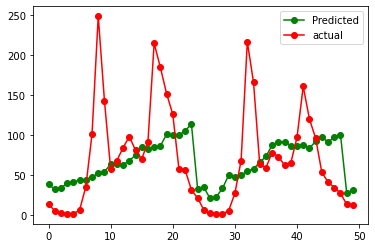

In [369]:
fig = plt.figure()
predicted = plt.plot(range(50), Y_test_hat[:50],'go-',label='Predicted')
actual = plt.plot(range(50), Y_test[:50], 'ro-',label="actual")
plt.legend()
plt.show()

In [359]:
R2rmse_validation_array=[]
for lambda_v in lambda_values:
    Rw=gradient_descent2(RX_train,RY_train,iterations = 5000, reg_const =lambda_v)
    RY_validation_hat = np.exp(np.matmul(RX_validation, Rw))
    R2rmse_validation = np.sqrt(np.mean((RY_validation - RY_validation_hat)**2))
    R2rmse_validation_array.append(R2rmse_validation)
    

In [363]:
min_index=R2rmse_validation_array.index(min(R2rmse_validation_array))
op_lambda=lambda_values[min_index]
Rwcap=gradient_descent1(RX_train,RY_train,reg_const=op_lambda,iterations = 40000)

In [370]:
Y_test_hat = np.exp(np.matmul(X_test, Rwcap))
R2rmse_test = np.sqrt(np.mean((Y_test - Y_test_hat)**2))

In [371]:
print(R2rmse_test)

235.092027696097


In [ ]:
fig = plt.figure()
predicted = plt.plot(range(50), Y_test_hat[:50],'go-',label='Predicted')
actual = plt.plot(range(50), Y_test[:50], 'ro-',label="actual")
plt.legend()
plt.show()